# Contour Detection

Contours are the boundaries of a shape with same intensity

**Difference between Contours and edges :**

Contours can actually do a bit more than "just" detect edges. The algorithm does indeed find edges of images, but also puts them in a hierarchy. This means that you can request outer borders of objects detected in your images. Such a thing would not be (directly) possible if you only check for edges.

In [166]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline

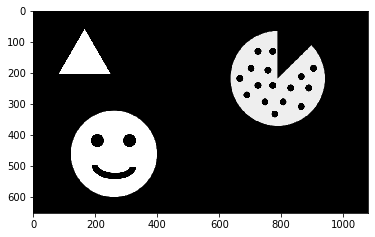

In [184]:
img = cv2.imread('internal_external.png',0)
plt.imshow(img,cmap = 'gray')

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

If you pass cv2.CHAIN_APPROX_NONE, all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we need just two end points of that line. This is what cv2.CHAIN_APPROX_SIMPLE does

In [185]:
contours,hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [186]:
#Creating a plain white image
white_img = np.ones((652, 1080,3),np.uint8)
white_img[:] = 255

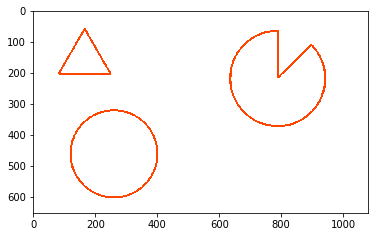

In [187]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(white_img,contours,i,(255,69,0),5)
plt.imshow(white_img)    

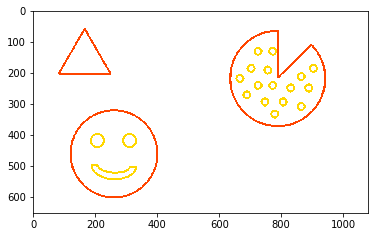

In [188]:
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(white_img,contours,i,(255,215,0),5)
plt.imshow(white_img)   